In [1]:
import rasterio

tif_file = rasterio.open('/Users/jonathanlifferth/data/maps/GHS_POP_E2015_GLOBE_R2019A_4326_30ss_V1_0/GHS_POP_E2015_GLOBE_R2019A_4326_30ss_V1_0.tif')
ghs_data = tif_file.read()

In [2]:
import numpy as np

print("Tiff Boundary", tif_file.bounds)
print("Tiff CRS", tif_file.crs)
print("Data shape", ghs_data.shape)
print("Max value", np.amax(ghs_data))
print("Min value", np.amin(ghs_data))

Tiff Boundary BoundingBox(left=-180.0, bottom=-90.0, right=180.0, top=90.0)
Tiff CRS EPSG:4326
Data shape (1, 21600, 43200)
Max value 459434.619140625
Min value -200.0


In [3]:
ghs_data[0][ghs_data[0] < 0.0] = 0.0

In [4]:
from matplotlib import cm
from matplotlib.colors import BoundaryNorm, LinearSegmentedColormap, ListedColormap


In [5]:

ourcmap = cm.get_cmap('hot_r', 460)
newcolors = ourcmap(np.linspace(0, 1, 460))
background_colour = np.array([0.9882352941176471, 0.9647058823529412, 0.9607843137254902, 1.0])
newcolors[:1, :] = background_colour
newcmp = ListedColormap(newcolors)

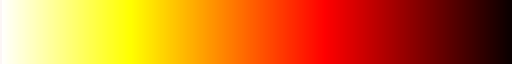

In [6]:
newcmp

In [7]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors

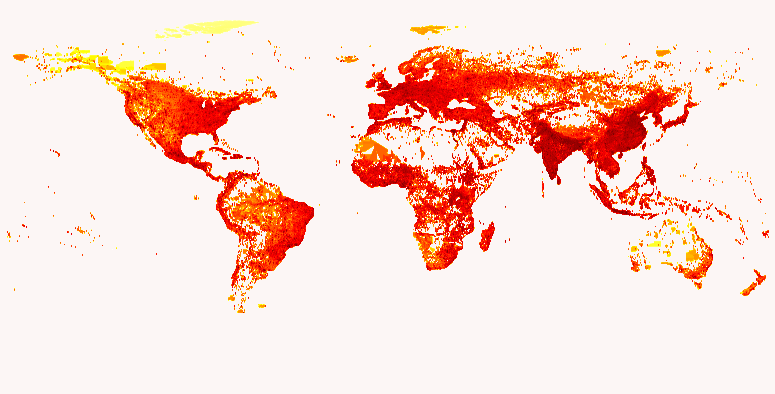

In [8]:

fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(14, 7)
ax.imshow(ghs_data[0], norm=colors.LogNorm(), cmap=newcmp)
ax.axis('off')
plt.show()
fig.savefig('./images/global_population_density_1.png', dpi=1000)

In [9]:
our_cmap = cm.get_cmap('hot_r', 10)
newcolors = our_cmap(np.linspace(0, 1, 10))
background_colour = np.array([0.9882352941176471, 0.9647058823529412, 0.9607843137254902, 1.0])
newcolors = np.vstack((background_colour, newcolors))
our_cmap = ListedColormap(newcolors)
bounds = [0.0, 1, 5, 10, 20, 50, 100, 200, 1000, 2000, 10000]
norm = colors.BoundaryNorm(bounds, our_cmap.N)

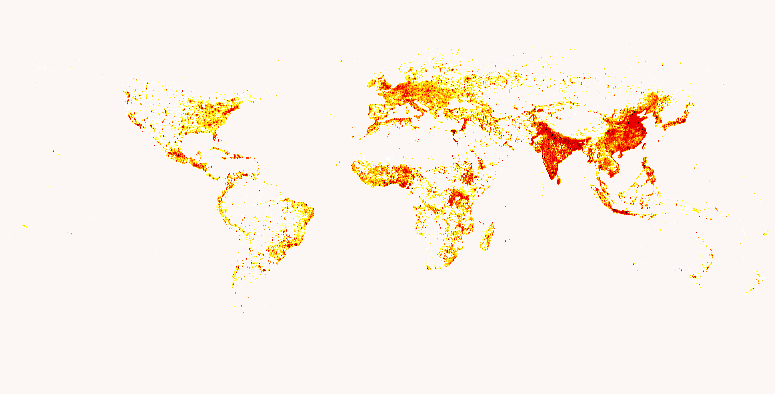

In [10]:
fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(14, 7)
ax.imshow(ghs_data[0], norm=norm, cmap=our_cmap)
ax.axis('off')
plt.show()

In [11]:
import geopandas as gpd
import pandas as pd

df = gpd.read_file('/Users/jonathanlifferth/data/natural_earth_vector/10m_cultural/ne_10m_admin_0_countries.shp')
western_europe = df.loc[df['ADMIN'].isin(['United Kingdom', 'Germany', 'Austria', 'Czechia',
                                              'Italy', 'Denmark', 'Luxembourg',
                                              'Belgium', 'Switzerland', 'Ireland'])]
france = df.loc[df['ADMIN'] == 'France']
Polygons = list(france.iloc[0].geometry)
france.geometry = [Polygons[1]]

spain = df.loc[df['ADMIN'] == 'Spain']
Polygons = list(spain.iloc[0].geometry)
spain.geometry = [Polygons[2]]

netherlands = df.loc[df['ADMIN'] == 'Netherlands']
Polygons = list(netherlands.iloc[0].geometry)
netherlands.geometry = [Polygons[0]]


portugal = df.loc[df['ADMIN'] == 'Portugal']
Polygons = list(portugal.iloc[0].geometry)
portugal.geometry = [Polygons[0]]

western_europe = pd.concat([western_europe, france, spain, netherlands, portugal])
western_europe

/var/folders/sw/bhwsqj457gg7f1ycx1_p1j480000gn/T/ipykernel_59939/2813580593.py:9: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  Polygons = list(france.iloc[0].geometry)
/var/folders/sw/bhwsqj457gg7f1ycx1_p1j480000gn/T/ipykernel_59939/2813580593.py:9: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  Polygons = list(france.iloc[0].geometry)
/Users/jonathanlifferth/Library/Python/3.9/lib/python/site-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
48,Admin-0 country,0,5,Czechia,CZE,0,2,Sovereign country,Czechia,CZE,...,None,None,None,None,None,None,None,None,None,"POLYGON ((14.81039 50.85845, 14.83168 50.85798..."
49,Admin-0 country,0,2,Germany,DEU,0,2,Sovereign country,Germany,DEU,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((13.81572 48.76643, 13.78586 48..."
57,Admin-0 country,0,6,Luxembourg,LUX,0,2,Sovereign country,Luxembourg,LUX,...,None,None,None,None,None,None,None,None,None,"POLYGON ((6.11749 50.12046, 6.11056 50.10599, ..."
59,Admin-0 country,0,2,Belgium,BEL,0,2,Sovereign country,Belgium,BEL,...,None,None,None,None,None,None,None,None,None,"POLYGON ((2.52180 51.08754, 2.54200 51.09687, ..."
70,Admin-0 country,0,4,Denmark,DN1,1,2,Country,Denmark,DNK,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((8.66078 54.89631, 8.66879 54.9..."
77,Admin-0 country,0,3,Ireland,IRL,0,2,Sovereign country,Ireland,IRL,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-7.24710 55.06932, -7.26650 55..."
78,Admin-0 country,0,2,United Kingdom,GB1,1,2,Country,United Kingdom,GBR,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-7.24710 55.06932, -7.25674 55..."
88,Admin-0 country,0,4,Austria,AUT,0,2,Sovereign country,Austria,AUT,...,None,None,None,None,None,None,None,None,None,"POLYGON ((16.94504 48.60417, 16.95434 48.55740..."
90,Admin-0 country,0,2,Italy,ITA,0,2,Sovereign country,Italy,ITA,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((7.02208 45.92526, 7.06694 45.8..."
91,Admin-0 country,0,4,Switzerland,CHE,0,2,Sovereign country,Switzerland,CHE,...,None,None,None,None,None,None,None,None,None,"POLYGON ((10.45381 46.86443, 10.44854 46.83223..."


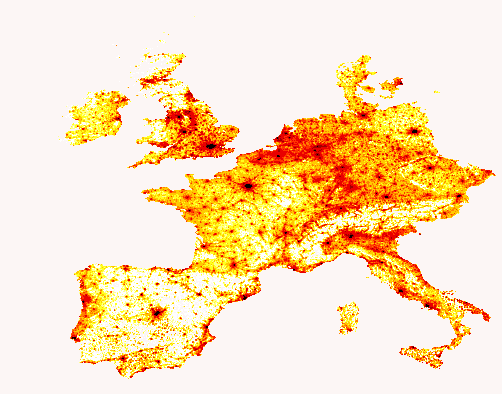

In [23]:
from shapely.geometry import mapping
from rasterio import mask as msk

europe_array, clipped_transform = msk.mask(tif_file, [mapping(geom) for geom in western_europe.geometry.tolist()], crop=True)

fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(14, 7)
ax.imshow(europe_array[0], norm=norm, cmap=our_cmap)
ax.axis('off')
fig.savefig('./images/europe_density_3.png', dpi=1000)
plt.show()

In [13]:
df.ADMIN.unique()

array(['Indonesia', 'Malaysia', 'Chile', 'Bolivia', 'Peru', 'Argentina',
       'Dhekelia Sovereign Base Area', 'Cyprus', 'India', 'China',
       'Israel', 'Palestine', 'Lebanon', 'Ethiopia', 'South Sudan',
       'Somalia', 'Kenya', 'Malawi', 'United Republic of Tanzania',
       'Syria', 'Somaliland', 'France', 'Suriname', 'Guyana',
       'South Korea', 'North Korea', 'Morocco', 'Western Sahara',
       'Costa Rica', 'Nicaragua', 'Republic of the Congo',
       'Democratic Republic of the Congo', 'Bhutan', 'Ukraine', 'Belarus',
       'Namibia', 'South Africa', 'Saint Martin', 'Sint Maarten', 'Oman',
       'Uzbekistan', 'Kazakhstan', 'Tajikistan', 'Lithuania', 'Brazil',
       'Uruguay', 'Mongolia', 'Russia', 'Czechia', 'Germany', 'Estonia',
       'Latvia', 'Norway', 'Sweden', 'Finland', 'Vietnam', 'Cambodia',
       'Luxembourg', 'United Arab Emirates', 'Belgium', 'Georgia',
       'North Macedonia', 'Albania', 'Azerbaijan', 'Kosovo', 'Turkey',
       'Spain', 'Laos', 'Kyrgyzsta

In [14]:
df = gpd.read_file('/Users/jonathanlifferth/data/natural_earth_vector/10m_cultural/ne_10m_admin_0_countries.shp')

USA = df.loc[df['ADMIN'] == 'United States of America']
USA

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
154,Admin-0 country,0,2,United States of America,US1,1,2,Country,United States of America,USA,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.75302 48.99251, -122.6532..."


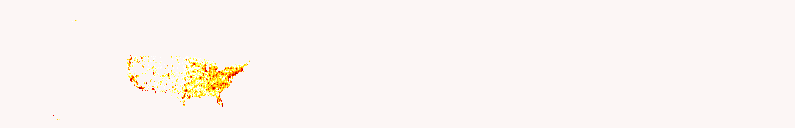

In [27]:
USA_array, clipped_transform = msk.mask(tif_file, [mapping(geom) for geom in USA.geometry.tolist()], crop=True)

fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(14, 7)
ax.imshow(USA_array[0], norm=norm, cmap=our_cmap)
ax.axis('off')
fig.savefig('./images/USA_1000density.png', dpi=1000)
plt.show()

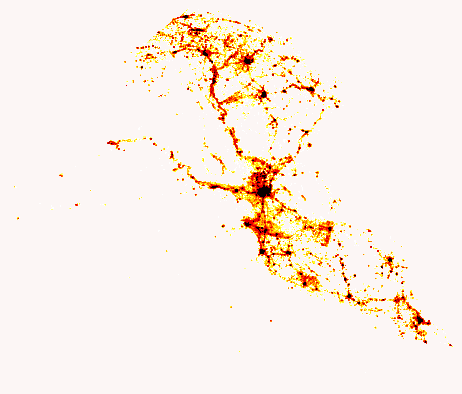

In [28]:
Iraq = df.loc[df['ADMIN'] == 'Iraq']

Iraq_array, clipped_transform = msk.mask(tif_file, [mapping(geom) for geom in Iraq.geometry.tolist()], crop=True)

fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(14, 7)
ax.imshow(Iraq_array[0], norm=norm, cmap=our_cmap)
ax.axis('off')
fig.savefig('./images/iraq_1000density.png', dpi=1000)
plt.show()

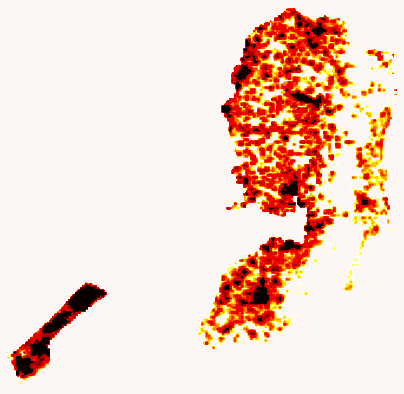

In [29]:
Palestine = Iraq = df.loc[df['ADMIN'] == 'Palestine']

Palestine_array, clipped_transform = msk.mask(tif_file, [mapping(geom) for geom in Iraq.geometry.tolist()], crop=True)

fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(14, 7)
ax.imshow(Palestine_array[0], norm=norm, cmap=our_cmap)
ax.axis('off')
fig.savefig('./images/Palestine_1000density.png', dpi=1000)
plt.show()

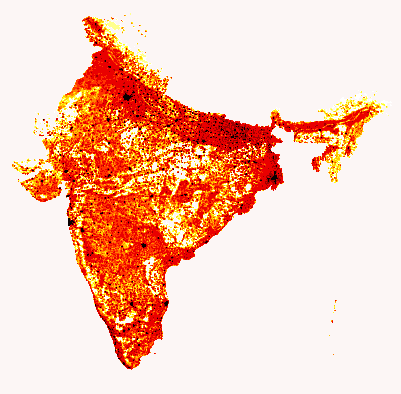

In [30]:
India = df.loc[df['ADMIN'] == 'India']

India_array, clipped_transform = msk.mask(tif_file, [mapping(geom) for geom in India.geometry.tolist()], crop=True)

fig, ax = plt.subplots(facecolor='#FCF6F5FF')
fig.set_size_inches(14, 7)
ax.imshow(India_array[0], norm=norm, cmap=our_cmap)
ax.axis('off')
fig.savefig('./images/India_1000density.png', dpi=1000)
plt.show()

In [19]:
def plot_country(country):
    country_df = df.loc[df['ADMIN'] == country]

    country_array, clipped_transform = msk.mask(tif_file, [mapping(geom) for geom in country_df.geometry.tolist()], crop=True)

    fig, ax = plt.subplots(facecolor='#FCF6F5FF')
    fig.set_size_inches(14, 7)
    ax.imshow(country_array[0], norm=norm, cmap=our_cmap)
    ax.axis('off')
    plt.show()

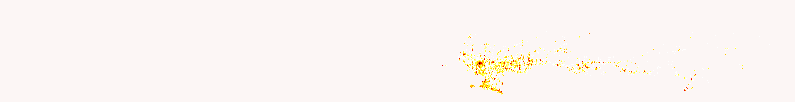

In [31]:
plot_country('Russia')
fig.savefig('./images/Russia_1000density.png', dpi=1000)


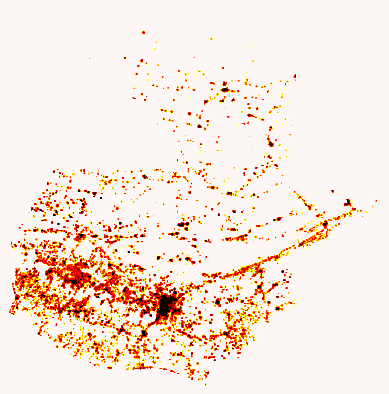

In [21]:
plot_country('Guatemala')

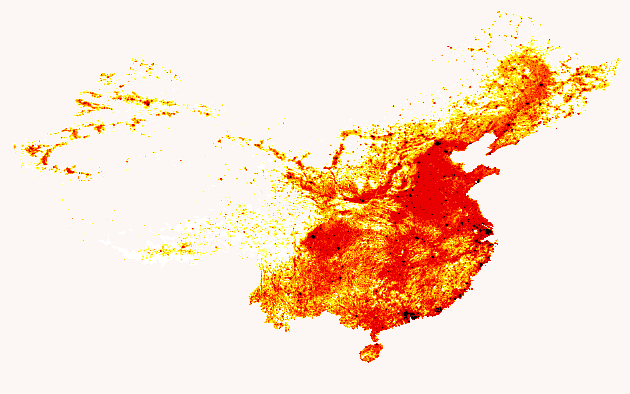

In [32]:
plot_country('China')
fig.savefig('./images/China_1000density.png', dpi=1000)
